In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

In [44]:
neff = np.sqrt(5.5+0.015j)
width = 0.3
shift = 0
n1 = 1.3
n2 = neff
n3 = n1

def TM_mode_eq(k, beta, N):
    p = np.sqrt(beta**2 - (k*n1)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)
    r = np.sqrt(beta**2 - (k*n3)**2)
    return np.real(width*q - np.arctan(n2**2*p/n1**2/q) - np.arctan(n2**2*r/n3**2/q) - np.pi*N)

def TM_H_y(b, l, x, z):
    k = 2*np.pi/l
    beta = b*k

    p = np.sqrt(beta**2 - (k*n1)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)

    return np.real((-n1**2*p/n2**2/q*np.cos(q*(z-shift))+np.sin(q*(z-shift)))*np.exp(-1j*beta*x))

def TM_E_z(b, l, x, z):
    k = 2*np.pi/l
    beta = b*k

    p = np.sqrt(beta**2 - (k*n1)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)

    return (beta/neff**2*(-n1**2*p/n2**2/q*np.cos(q*(z-shift))+np.sin(q*(z-shift)))*np.exp(-1j*beta*x))

def TM_E_x(b, l, x, z):
    k = 2*np.pi/l
    beta = b*k

    p = np.sqrt(beta**2 - (k*n1)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)

    return (-p/neff**2*(n1**2*p/n2**2/q*np.sin(q*(z-shift))+np.cos(q*(z-shift)))*np.exp(-1j*(beta*x + np.pi/2)))

def ITMOKE(b, l, x, z):
    Ex = TM_E_x(b, l, x, z)
    Ez = TM_E_z(b, l, x, z) 

    return np.real((Ex*np.conj(Ez) - Ez*np.conj(Ex))*(-1j))
    

Text(0, 0.5, 'Normalaized propagation constant')

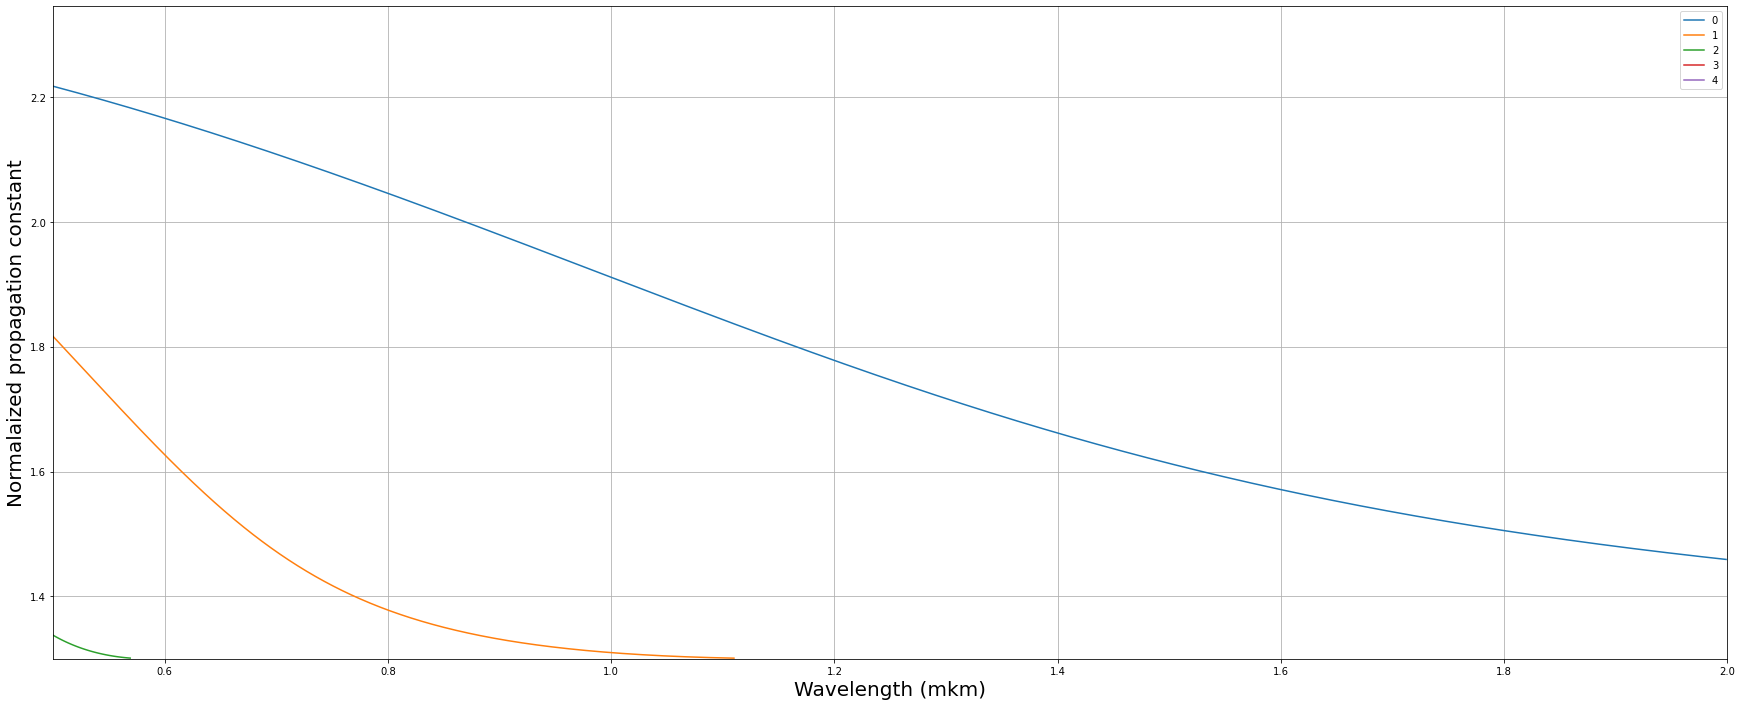

In [41]:
#Plot dispersion curves

fig, ax = plt.subplots(figsize=(30, 12))
ax.grid(which='both')

Res = []

L = np.arange(0.5, 2, 0.001)
for n in range(5):
    res = []
    res_fsolve = []

    for l in L:
        k = 2*np.pi/l
        l_b = k*1.301
        r_b = k*2.344
        if TM_mode_eq(k, l_b, n)*TM_mode_eq(k, r_b, n) < 0:
            beta = opt.brentq(lambda x: TM_mode_eq(k, x, n), l_b, r_b)
            res.append((l, beta/k))

    res_k = [x[0] for x in res]
    res_b = [x[1] for x in res]

    Res.append({'mode': n, 'lambda': res_k, 'beta': res_b})

    ax.plot(res_k, res_b, label=n)

ax.legend()
ax.set_xlim(0.5, 2)
ax.set_ylim(1.3, 2.345)
ax.set_xlabel('Wavelength (mkm)', size='20')
ax.set_ylabel('Normalaized propagation constant', size='20')

In [42]:
for_plotting = []

for x in Res[:-3]:
    for i, y in enumerate(x['lambda']):
        if y > 0.8545 and y < 0.856:
            for_plotting.append((x['mode'], y, x['beta'][i]))

for_plotting

[(0, 0.8550000000000003, 2.0094528268659206),
 (1, 0.8550000000000003, 1.3481521335330906)]

/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_9209/2119481582.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


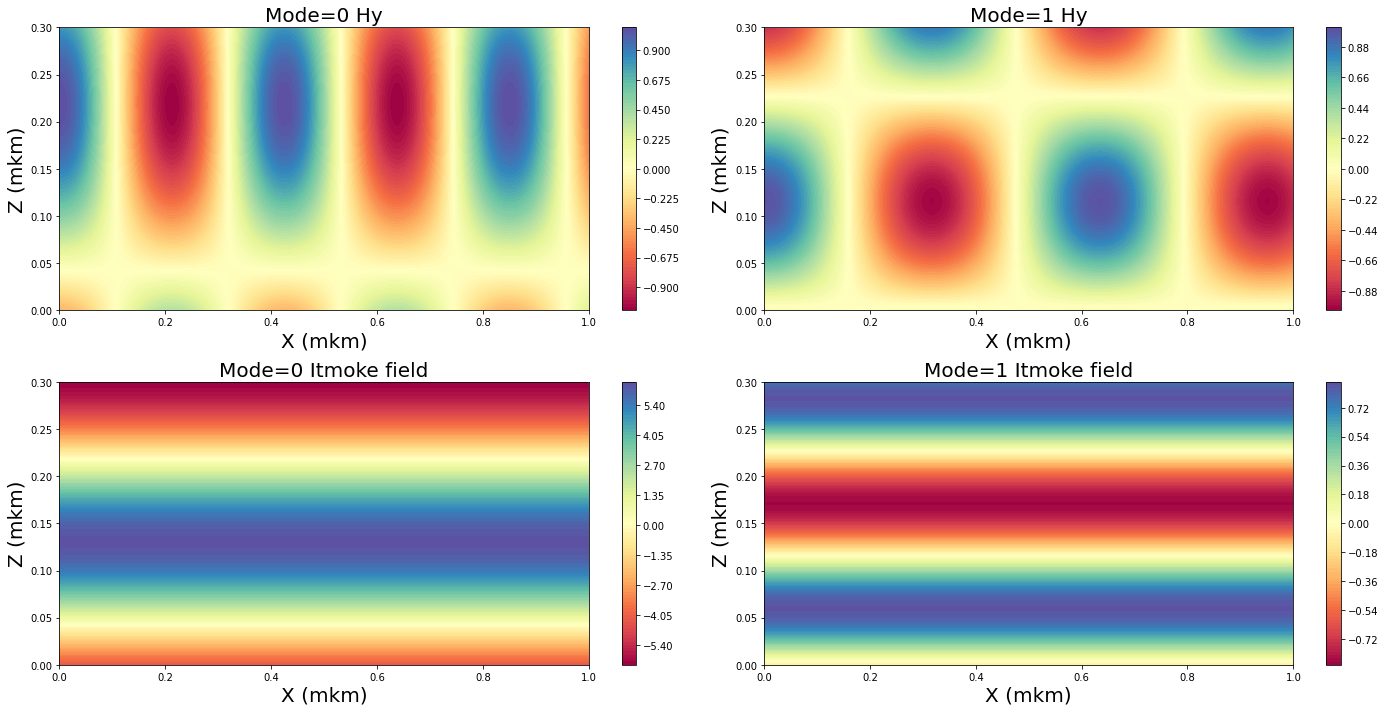

In [45]:
fig, axes = plt.subplots(figsize=(20, 10), ncols=2, nrows=2)
axes = axes.reshape(-1)
cmap = plt.get_cmap(name='Spectral')

for i, item in enumerate(for_plotting):
    m, lam, beta = item
    X = np.arange(0, 1, 0.001)
    Z = np.arange(0, 0.3, 0.001)

    X, Z = np.meshgrid(X, Z)
    H_y = TM_H_y(beta, lam, X, Z)
    Itm = ITMOKE(beta, lam, X, Z)

    cf = axes[i].contourf(X, Z, H_y, 100, cmap = cmap)
    fig.colorbar(cf, ax=axes[i])
    axes[i].set_title(f'Mode={m} Hy', size=20)
    axes[i].set_xlabel('X (mkm)', size=20)
    axes[i].set_xlim(0, 1)
    axes[i].set_ylabel('Z (mkm)', size=20)
    axes[i].set_ylim(0, 0.3)

    cf = axes[i+2].contourf(X, Z, Itm, 100, cmap = cmap)
    fig.colorbar(cf, ax=axes[i+2])
    axes[i+2].set_title(f'Mode={m} Itmoke field', size=20)
    axes[i+2].set_xlabel('X (mkm)', size=20)
    axes[i+2].set_xlim(0, 1)
    axes[i+2].set_ylabel('Z (mkm)', size=20)
    axes[i+2].set_ylim(0, 0.3)

fig.tight_layout()
fig.show()


# result from MatLab

[None, None, None]

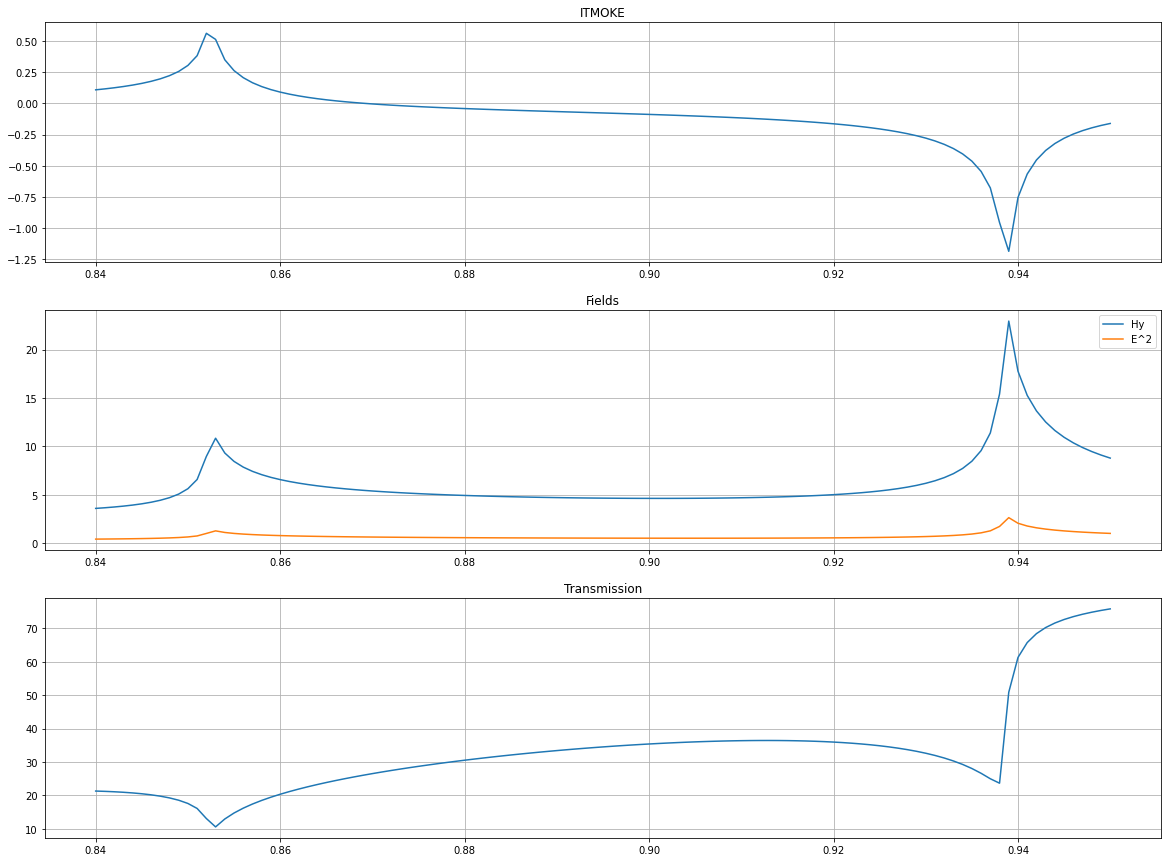

In [63]:
data = np.loadtxt('result.dat', delimiter=',')
data_transm = np.loadtxt('Itmoke_transm.dat')
x = data[:, 0]
ITM = data[:, 1]
Hy = data[:, 2]
E = data[:, 3]

fig, ax = plt.subplots(figsize=(20, 15), ncols=1, nrows=3)

ax[0].set_title('ITMOKE')
ax[0].plot(x, ITM)

ax[1].set_title('Fields')
ax[1].plot(x, Hy, label='Hy')
ax[1].plot(x, E, label='E^2')
ax[1].legend()

ax[2].set_title('Transmission')
ax[2].plot(data_transm[:,0], data_transm[:,1])

[ax_.grid() for ax_ in ax]

In [76]:
matrix = np.random.random((1000, 1000)) + 1j*np.random.random((1000, 1000))


In [78]:
%%time
np.dot(matrix, matrix)

CPU times: user 708 ms, sys: 13.7 ms, total: 722 ms
Wall time: 124 ms


array([[ 10.39107911+495.91268963j,  -1.07906033+522.21279842j,
         -7.18357529+500.07614732j, ...,  -4.23025059+500.871107j  ,
          3.50972372+497.52493701j,   4.04768545+493.95785624j],
       [  9.16293232+493.12209233j,  -0.07503028+510.33048825j,
         -3.09228126+497.06048268j, ...,   1.71443811+493.43476815j,
          5.4440507 +496.54508422j,   5.12134435+486.2849599j ],
       [  1.12142603+499.62580405j,  -4.01463383+528.02751627j,
         -9.77431167+502.30969624j, ..., -11.63666673+508.34071038j,
         -6.12504717+506.79952383j,  -6.63066931+498.10618071j],
       ...,
       [ 13.83782308+495.62409474j,   5.11557028+513.01091309j,
          8.28296037+501.62085606j, ...,   6.53794503+500.00117395j,
         17.78508045+503.87635437j,  12.85548024+493.13853767j],
       [ -5.3738444 +488.2936511j ,  -4.6309457 +515.06086063j,
        -14.77932145+497.78980371j, ..., -10.15620861+497.37501337j,
         -1.90258397+490.49221863j,   1.08672578+482.70580158j]